## Step.1 Import necessary library for Web Scrapping

In [1]:
import re
import bs4
import requests

In [2]:
# check for url_format
'https://www.one2car.com/%E0%B8%A3%E0%B8%96-%E0%B8%AA%E0%B8%B3%E0%B8%AB%E0%B8%A3%E0%B8%B1%E0%B8%9A-%E0%B8%82%E0%B8%B2%E0%B8%A2?sort=modification_date_search.desc&page_number=11&page_size=26'


'https://www.one2car.com/%E0%B8%A3%E0%B8%96-%E0%B8%AA%E0%B8%B3%E0%B8%AB%E0%B8%A3%E0%B8%B1%E0%B8%9A-%E0%B8%82%E0%B8%B2%E0%B8%A2?sort=modification_date_search.desc&page_number=11&page_size=26'

In [3]:
# check for url_format
'https://www.one2car.com/%E0%B8%A3%E0%B8%96-%E0%B8%AA%E0%B8%B3%E0%B8%AB%E0%B8%A3%E0%B8%B1%E0%B8%9A-%E0%B8%82%E0%B8%B2%E0%B8%A2?sort=modification_date_search.desc&page_number=16&page_size=26'

'https://www.one2car.com/%E0%B8%A3%E0%B8%96-%E0%B8%AA%E0%B8%B3%E0%B8%AB%E0%B8%A3%E0%B8%B1%E0%B8%9A-%E0%B8%82%E0%B8%B2%E0%B8%A2?sort=modification_date_search.desc&page_number=16&page_size=26'

In [4]:
## create our base_url to apply page number to scrape through each pages  
base_url = 'https://www.one2car.com/%E0%B8%A3%E0%B8%96-%E0%B8%AA%E0%B8%B3%E0%B8%AB%E0%B8%A3%E0%B8%B1%E0%B8%9A-%E0%B8%82%E0%B8%B2%E0%B8%A2?sort=modification_date_search.desc&page_number={}&page_size=26'

In [5]:
base_url

'https://www.one2car.com/%E0%B8%A3%E0%B8%96-%E0%B8%AA%E0%B8%B3%E0%B8%AB%E0%B8%A3%E0%B8%B1%E0%B8%9A-%E0%B8%82%E0%B8%B2%E0%B8%A2?sort=modification_date_search.desc&page_number={}&page_size=26'

In [6]:
# test our format
page_num = 1334
base_url.format(page_num)

'https://www.one2car.com/%E0%B8%A3%E0%B8%96-%E0%B8%AA%E0%B8%B3%E0%B8%AB%E0%B8%A3%E0%B8%B1%E0%B8%9A-%E0%B8%82%E0%B8%B2%E0%B8%A2?sort=modification_date_search.desc&page_number=1334&page_size=26'

In [55]:
## try to scrape only 1 page first
ex1 = base_url.format(1)
res = requests.get(ex1)
soup = bs4.BeautifulSoup(res.text, 'lxml')

In [58]:
## check for Cars Information tag
soup.select('a.ellipsize.js-ellipsize-text')

[<a class="ellipsize js-ellipsize-text" data-ellipsize-length="67" data-ga-show-id="9613634" data-ga-show-type="cad-lis" href="https://www.one2car.com/for-sale/honda-city-sv-i-vtec-กรุงเทพและปริมณฑล-อำเภอลาดหลุมแก้ว/9613634?auc=true">
         2014 Honda City 1.5 (ปี 14-18) SV i-VTEC Sedan    </a>,
 <a class="ellipsize js-ellipsize-text" data-ellipsize-length="67" data-ga-show-id="8890162" data-ga-show-type="cad-lis" href="https://www.one2car.com/for-sale/ford-mustang-ecoboost-กรุงเทพและปริมณฑล-นนทบุรี-รัตนาธิเบศร์/8890162">
         2016 Ford Mustang 2.3 (ปี 15-20) EcoBoost Coupe    </a>,
 <a class="ellipsize js-ellipsize-text" data-ellipsize-length="67" data-ga-show-id="9607009" data-ga-show-type="cad-lis" href="https://www.one2car.com/for-sale/suzuki-swift-glx-กรุงเทพและปริมณฑล-อำเภอลาดหลุมแก้ว/9607009?auc=true">
         2013 Suzuki Swift 1.2 (ปี 12-17) GLX Hatchback    </a>,
 <a class="ellipsize js-ellipsize-text" data-ellipsize-length="67" data-ga-show-id="9230613" data-ga-show-t

In [60]:
## check the numbers of data, if is it align with the website
len(soup.select('a.ellipsize.js-ellipsize-text'))

26

In [61]:
soup.select('a.ellipsize.js-ellipsize-text')[0].text

'\n        2014 Honda City 1.5 (ปี 14-18) SV i-VTEC Sedan    '

In [62]:
soup.select('a.ellipsize.js-ellipsize-text')[0].text.strip('\n')

'        2014 Honda City 1.5 (ปี 14-18) SV i-VTEC Sedan    '

In [63]:
soup.select('a.ellipsize.js-ellipsize-text')[0].text.strip('\n').strip(' ')

'2014 Honda City 1.5 (ปี 14-18) SV i-VTEC Sedan'

In [64]:
# find the patter to extract data for year
test = soup.select('a.ellipsize.js-ellipsize-text')[0].text.strip('\n').strip(' ')

pattern_yr = r'[^0-9]{4}'
car_year = int(re.split(pattern_yr, test)[0])
car_year

2014

In [65]:
# find the patter to extract data for car_model
test = soup.select('a.ellipsize.js-ellipsize-text')[0].text.strip('\n').strip(' ')

pattern_name = r'[^ A-za-z]'
re.split(pattern_name, test)[4].strip(' ')

'Honda City'

In [66]:
## test the pattern with other index to see if our regex works?
test = soup.select('a.ellipsize.js-ellipsize-text')[25].text.strip('\n').strip(' ')

pattern_name = r'[^ A-za-z]'
re.split(pattern_name, test)[4].strip(' ')

'Toyota Hilux Revo'

In [67]:
# scrape page 1 only
year_list = []
car_list = []
pattern_yr = r'[^0-9]{4}'
pattern_name = r'[^ A-za-z]'
i = 0

for i in range(len(soup.select('a.ellipsize.js-ellipsize-text'))):
    info = soup.select('a.ellipsize.js-ellipsize-text')[i].text.strip('\n').strip(' ')
    year_list.append(int(re.split(pattern_yr, info)[0]))
    car_list.append(re.split(pattern_name, info)[4].strip(' '))
    

In [68]:
print(year_list)

[2014, 2016, 2013, 2020, 2012, 2010, 2019, 2017, 2019, 2019, 2020, 2018, 2019, 2020, 2022, 2020, 2020, 2019, 2018, 2020, 2018, 2015, 2019, 2019, 2019, 2018]


In [69]:
print(car_list)

['Honda City', 'Ford Mustang', 'Suzuki Swift', 'Toyota Hilux Revo', 'Honda Jazz', 'Mitsubishi Space', 'Honda Civic', 'Isuzu D', 'Ford Ranger', 'Ford Ranger', 'Ford Ranger', 'Ford Ranger', 'Ford Ranger', 'Ford Ranger', 'Ford Ranger', 'Ford Ranger', 'Ford Ranger', 'Ford Ranger', 'Isuzu D', 'Isuzu D', 'Nissan March', 'Mitsubishi Pajero Sport', 'Nissan Almera', 'Honda Civic', 'Mazda', 'Toyota Hilux Revo']


In [70]:
soup.select('.listing__price.delta.weight--bold')[0]

<div class="listing__price delta weight--bold" x-ms-format-detection="none">399,000 บาท</div>

In [71]:
len(soup.select('.listing__price.delta.weight--bold'))

26

In [72]:
soup.select('.listing__price.delta.weight--bold')[0].text.strip('\n').strip(' ')

'399,000 บาท'

In [73]:
pr = soup.select('.listing__price.delta.weight--bold')[0].text.strip('\n').strip(' ')

pat = r'[ ^ก-๙]+'
re.split(pat, pr)[0]

'399,000'

In [74]:
price_list = []
pat = r'[ ^ก-๙]+'
i = 0
for i in range(len(soup.select('.listing__price.delta.weight--bold'))):
    pr = soup.select('.listing__price.delta.weight--bold')[0].text.strip('\n').strip(' ')
    price_list.append(int(re.split(pat, pr)[0].replace(',',"")))

In [75]:
import pandas as pd
import numpy as np

In [76]:
## create DataFrame from our web-scrapped data
df = pd.DataFrame({'model' : car_list, 'year' : year_list, 'price': price_list})

In [95]:
df.head()

,model,year,price
0,Honda City,2014,399000
1,Ford Mustang,2016,399000
2,Suzuki Swift,2013,399000
3,Toyota Hilux Revo,2020,399000
4,Honda Jazz,2012,399000


In [96]:
df.tail()

,model,year,price
21,Mitsubishi Pajero Sport,2015,399000
22,Nissan Almera,2019,399000
23,Honda Civic,2019,399000
24,Mazda,2019,399000
25,Toyota Hilux Revo,2018,399000


In [197]:
## try to go through 10 pages
base_url = 'https://www.one2car.com/%E0%B8%A3%E0%B8%96-%E0%B8%AA%E0%B8%B3%E0%B8%AB%E0%B8%A3%E0%B8%B1%E0%B8%9A-%E0%B8%82%E0%B8%B2%E0%B8%A2?sort=modification_date_search.desc&page_number={}&page_size=26'

one2car_year = []
one2car_model = []
one2car_price = []
pattern_yr = r'[^0-9]{4}'
pattern_name = r'[^ A-za-z]'
pattern_price = r'[[^A-Za-z% ]]'

for p in range(1,11): #there is 1334 pages, but i tried to scrape only 10 pages, due to the large number of data
    scrape_url = base_url.format(p)
    scrape_res = requests.get(scrape_url)
    
    scrape_soup = bs4.BeautifulSoup(scrape_res.text, 'lxml')
    
    for i in range(len(scrape_soup.select('a.ellipsize.js-ellipsize-text'))):
        info = scrape_soup.select('a.ellipsize.js-ellipsize-text')[i].text.strip('\n').strip(' ')
        one2car_year.append(int(re.split(pattern_yr, info)[0]))
        one2car_model.append(re.split(pattern_name, info)[4].strip(' '))
        
    for i in range(len(scrape_soup.select('.listing__price.delta.weight--bold'))):
        pr = scrape_soup.select('.listing__price.delta.weight--bold')[i].text.strip('\n').strip(' ')
        one2car_price.append(re.split(pattern_price, pr)[0].replace(',',""))
    

In [198]:
model_df = pd.DataFrame(one2car_model, columns=['model'])

In [199]:
model_df.head()

,model
0,Toyota Yaris
1,Nissan March
2,Mazda
3,Mazda
4,Nissan X


In [203]:
len(one2car_model)

104

In [204]:
len(one2car_price)

104

In [205]:
len(one2car_year)

104

In [206]:
year_df = pd.DataFrame(one2car_year, columns=['year'])

In [208]:
price_df = pd.DataFrame(one2car_price, columns=['price'])

In [210]:
one2car_df = pd.concat([model_df,year_df,price_df],axis=1)

In [212]:
one2car_df.head()

,model,year,price
0,Toyota Yaris,2016,419000 บาท
1,Nissan March,2015,229000 บาท
2,Mazda,2016,369000 บาท
3,Mazda,2009,215000 บาท
4,Nissan X,2015,678000 บาท


In [213]:
one2car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   model   104 non-null    object
 1   year    104 non-null    int64 
 2   price   104 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.6+ KB


In [217]:
one2car_df.iloc[0]

model    Toyota Yaris
year             2016
price      419000 บาท
Name: 0, dtype: object

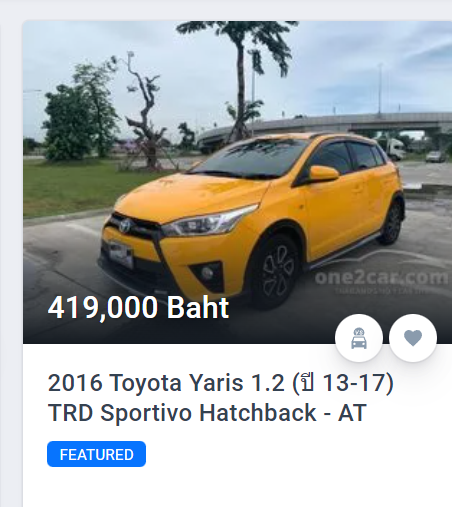

In [218]:
one2car_df.iloc[1]

model    Nissan March
year             2015
price      229000 บาท
Name: 1, dtype: object

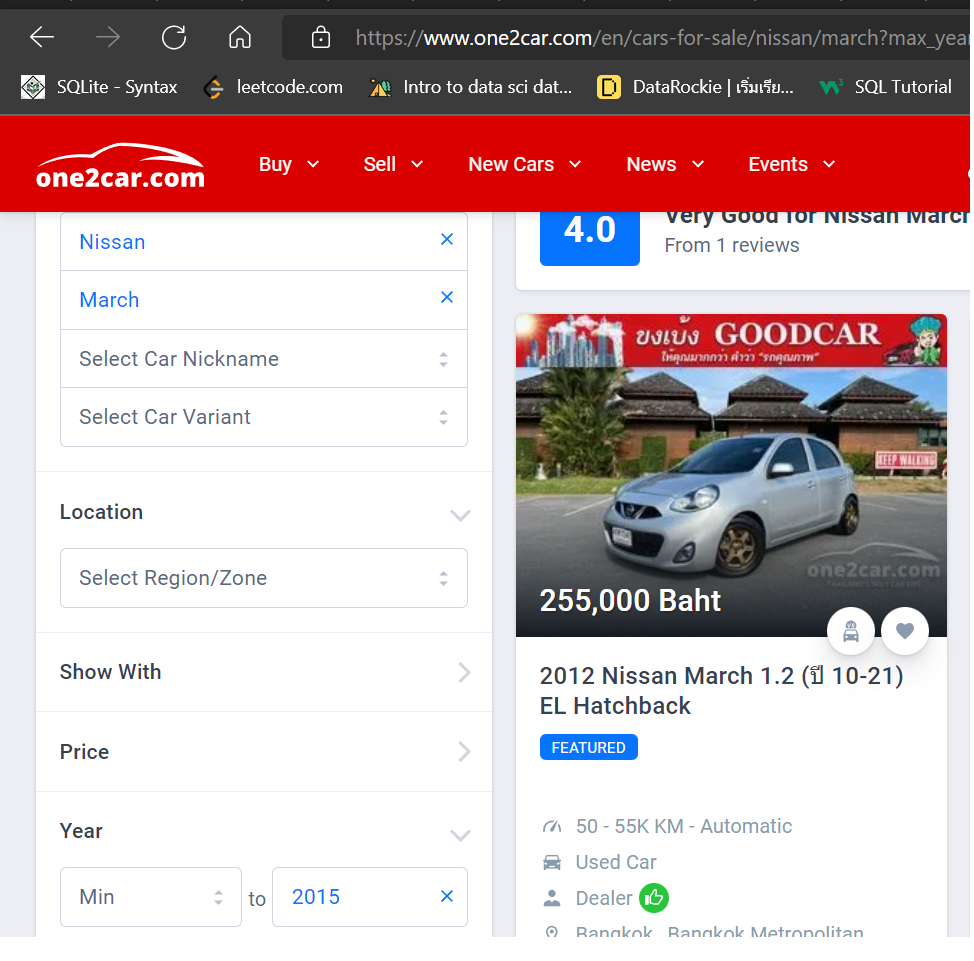